In [1]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate
import bisect

In [2]:
NEE1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test52 NEE1.csv.csv")
NEE2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test53 NEE2.csv.csv")
NEE3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test54 NEE3.csv.csv")
NEE4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test55 NEE4.csv.csv")
NEE5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test56 NEE5.csv.csv")

In [3]:
#Loading the corresponding force data
force_NEE1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#52 NEE1.log" , delimiter = "\t")
force_NEE2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#53 NEE2.log" , delimiter = "\t")
force_NEE3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#54 NEE3.log" , delimiter = "\t")
force_NEE4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#55 NEE4.log" , delimiter = "\t")
force_NEE5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#56 NEE5.log" , delimiter = "\t")

In [4]:
#Visulizing the force data - test #2 - 6 - NE1-5
plt.figure(figsize=(50, 30))

#Time for force
x_force_NEE1 = force_NEE1["Time"]
x_force_NEE2 = force_NEE2["Time"]
x_force_NEE3 = force_NEE3["Time"]
x_force_NEE4 = force_NEE4["Time"]
x_force_NEE5 = force_NEE5["Time"]

#force
Load_NEE1 = force_NEE1["Load"]
Load_NEE2 = force_NEE2["Load"]
Load_NEE3 = force_NEE3["Load"]
Load_NEE4 = force_NEE4["Load"]
Load_NEE5 = force_NEE5["Load"]

#plt.plot(x_force_NEE1,Load_NEE1,color = 'green', label = 'force data NEE1 test #52' )
#plt.plot(x_force_NEE2,Load_NEE2,color = 'blue', label = 'force data NEE2 test #53' )
# plt.plot(x_force_NEE3,Load_NEE3,color = 'yellow', label = 'force data NEE3 test #54' )
# plt.plot(x_force_NEE4,Load_NEE4,color = 'red', label = 'force data NEE4 test #55' )
# plt.plot(x_force_NEE5,Load_NEE5,color = 'brown', label = 'force data NEE5 test #56' )

<Figure size 3600x2160 with 0 Axes>

Sensor 4 is more profound for NEE1


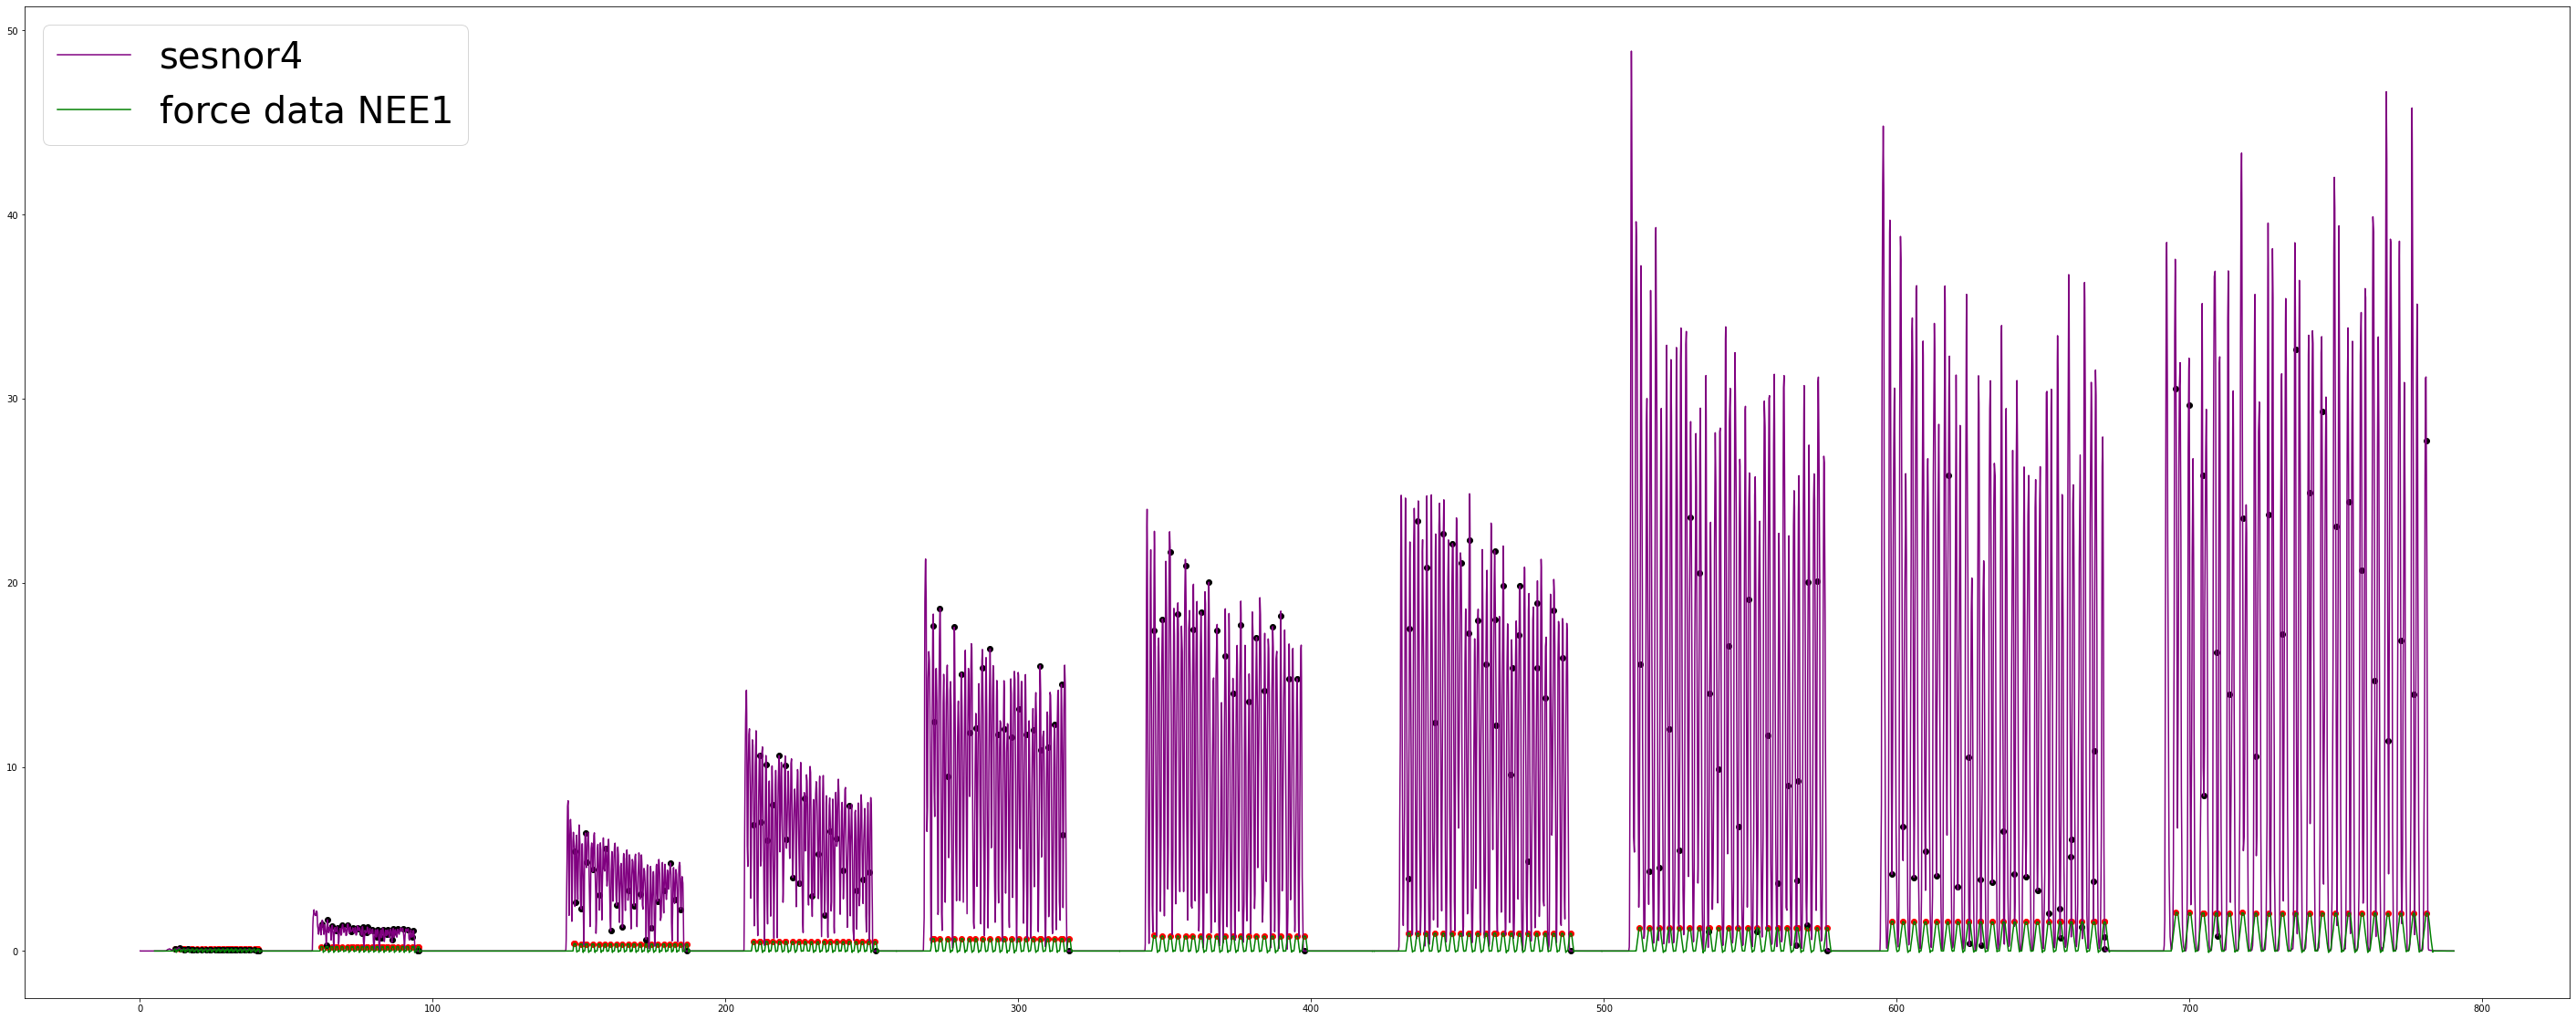

In [11]:
#visualizing the resistance data for each sensor NEE 1- 5 - NEE1

plt.figure(figsize=(50, 20))

# plt.plot(NEE1["Unnamed: 0"],NEE1["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NEE1["Unnamed: 0"],NEE1["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NEE1["Unnamed: 0"],NEE1["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NEE1["Unnamed: 0"],NEE1["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NEE1 = x_force_NEE1 + 5
scaled_NEE1 = NEE1["Unnamed: 0"]

plt.plot(scaled_NEE1,NEE1["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_NEE1,Load_NEE1,color = 'green', label = 'force data NEE1' )

plt.legend(fontsize=40)

print("Sensor 4 is more profound for NEE1")

#finding the peaks

pidx_Load_NEE1, _ = find_peaks(Load_NEE1,prominence= 0.1 )
peaks_Load_NEE1 = Load_NEE1[pidx_Load_NEE1]
peaks_Ltime_NEE1 = scaled_x_force_NEE1[pidx_Load_NEE1]

plt.scatter(peaks_Ltime_NEE1,peaks_Load_NEE1,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NEE1time = []

peaks_Ltime_NEE1.reset_index(drop = True, inplace = True)
peaks_Load_NEE1.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NEE1)):
    idx_NEE1time.append(bisect.bisect_left(NEE1["Unnamed: 0"], peaks_Ltime_NEE1[i]))

plt.scatter(NEE1["Unnamed: 0"][idx_NEE1time],NEE1["s4_d"][idx_NEE1time],color = 'black')

In [30]:
#Storing the peaks into csv file - NEE1
Load_NEE1peaks =[]

for i in range(len(peaks_Load_NEE1)):
    Load_NEE1peaks.append(peaks_Load_NEE1[i])
    
content_NEE1 = {'R1':NEE1["s1_d"][idx_NEE1time],
              'R2':NEE1["s2_d"][idx_NEE1time],
              'R3':NEE1["s3_d"][idx_NEE1time],
              'R4':NEE1["s4_d"][idx_NEE1time], 
              'Load': Load_NEE1peaks} 

df_NEE1 = pd.DataFrame(content_NEE1, columns = ['R1','R2','R3','R4','Load'])

df_NEE1.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NEE1.csv',index = False, header = True)

Sensor 4 is more profound for NEE2


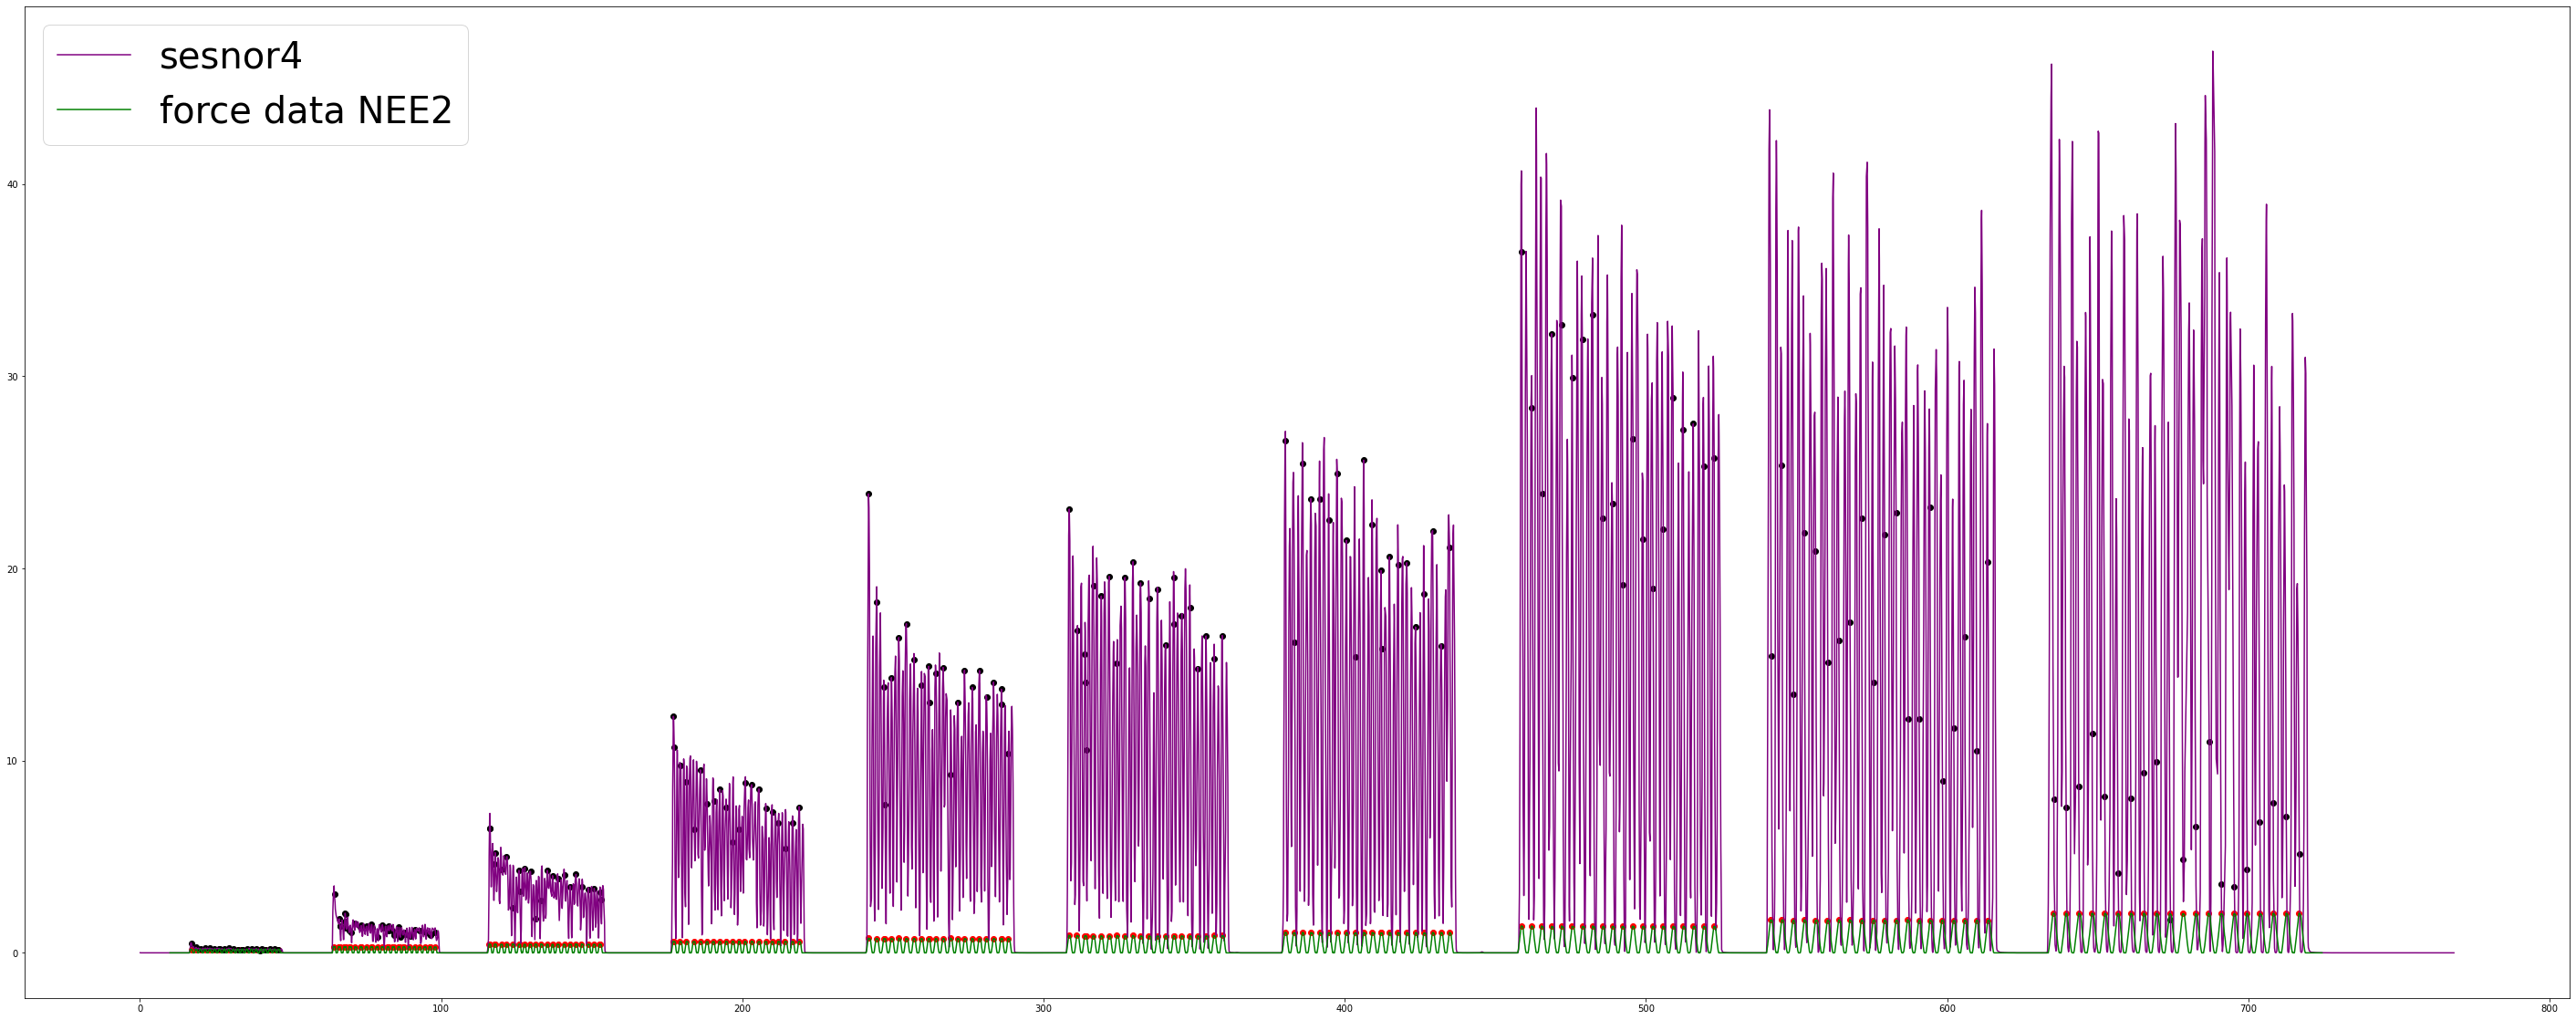

In [15]:
#visualizing the resistance data for each sensor NEE 1- 5 - NEE2

plt.figure(figsize=(50, 20))

# plt.plot(NEE2["Unnamed: 0"],NEE2["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NEE2["Unnamed: 0"],NEE2["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NEE2["Unnamed: 0"],NEE2["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NEE2["Unnamed: 0"],NEE2["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NEE2 = x_force_NEE2 + 10
scaled_NEE2 = NEE2["Unnamed: 0"]

plt.plot(scaled_NEE2,NEE2["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_NEE2,Load_NEE2,color = 'green', label = 'force data NEE2' )

plt.legend(fontsize=40)

print("Sensor 4 is more profound for NEE2")

#finding the peaks

pidx_Load_NEE2, _ = find_peaks(Load_NEE2,prominence= 0.1 )
peaks_Load_NEE2 = Load_NEE2[pidx_Load_NEE2]
peaks_Ltime_NEE2 = scaled_x_force_NEE2[pidx_Load_NEE2]

plt.scatter(peaks_Ltime_NEE2,peaks_Load_NEE2,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NEE2time = []

peaks_Ltime_NEE2.reset_index(drop = True, inplace = True)
peaks_Load_NEE2.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NEE2)):
    idx_NEE2time.append(bisect.bisect_left(NEE2["Unnamed: 0"], peaks_Ltime_NEE2[i]))

plt.scatter(NEE2["Unnamed: 0"][idx_NEE2time],NEE2["s4_d"][idx_NEE2time],color = 'black')

In [31]:
#Storing the peaks into csv file - NEE2
Load_NEE2peaks =[]

for i in range(len(peaks_Load_NEE2)):
    Load_NEE2peaks.append(peaks_Load_NEE2[i])
    
content_NEE2 = {'R1':NEE2["s1_d"][idx_NEE2time],
              'R2':NEE2["s2_d"][idx_NEE2time],
              'R3':NEE2["s3_d"][idx_NEE2time],
              'R4':NEE2["s4_d"][idx_NEE2time], 
              'Load': Load_NEE2peaks} 

df_NEE2 = pd.DataFrame(content_NEE2, columns = ['R1','R2','R3','R4','Load'])

df_NEE2.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NEE2.csv',index = False, header = True)

Sensor 3 is more profound for NEE3


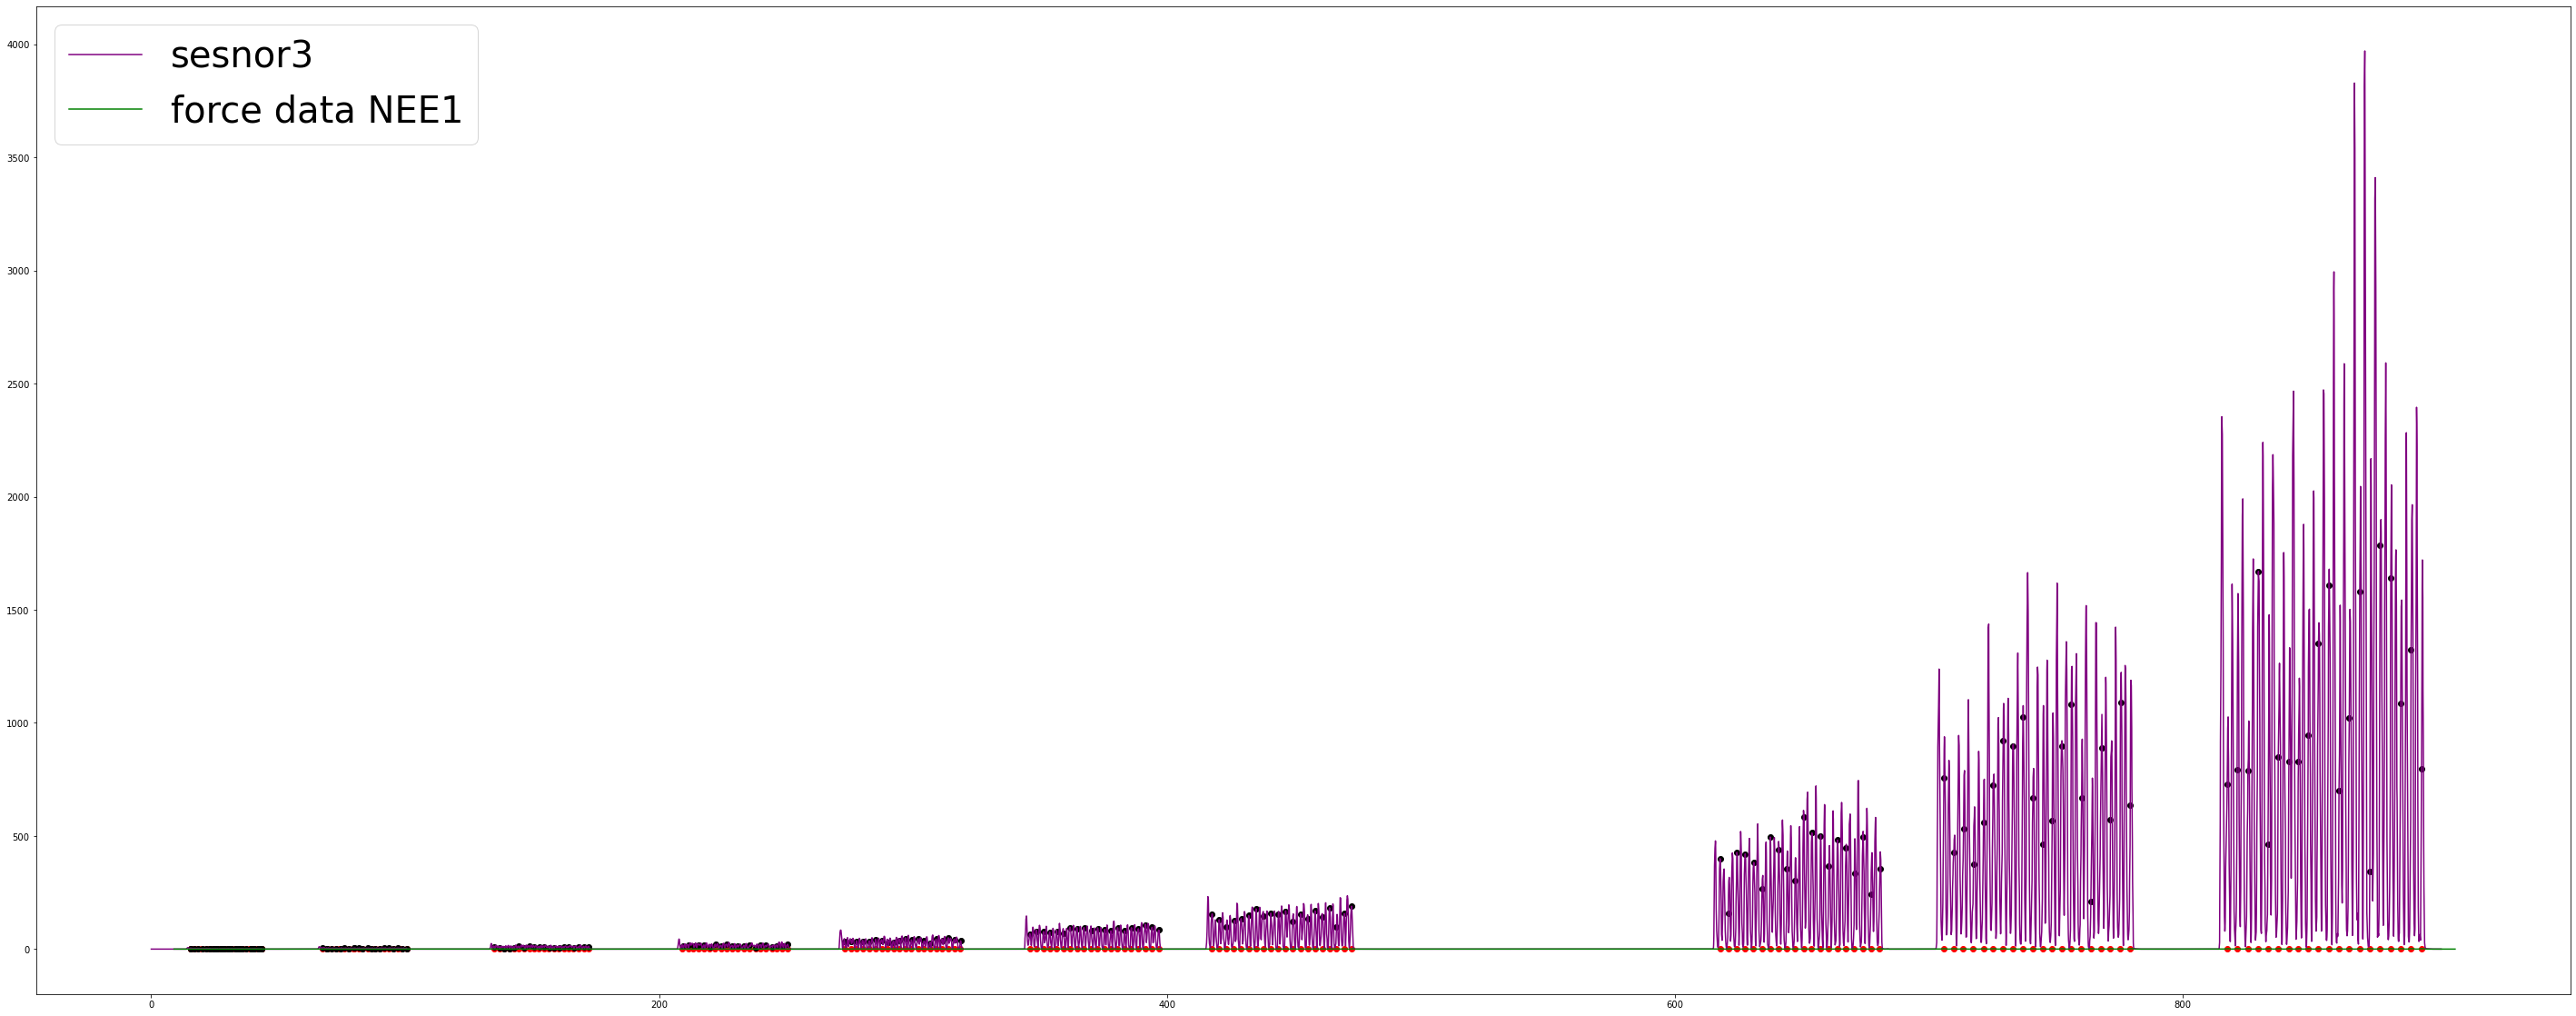

In [51]:
#visualizing the resistance data for each sensor NEE 1- 5 - NEE3

plt.figure(figsize=(50, 20))

# plt.plot(NEE3["Unnamed: 0"],NEE3["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NEE3["Unnamed: 0"],NEE3["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NEE3["Unnamed: 0"],NEE3["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NEE3["Unnamed: 0"],NEE3["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NEE3 = x_force_NEE3 + 9
scaled_NEE3 = NEE3["Unnamed: 0"]

plt.plot(scaled_NEE3,NEE3["s3_d"], color = 'purple', label = 'sesnor3')
plt.plot(scaled_x_force_NEE3,Load_NEE3,color = 'green', label = 'force data NEE1' )

plt.legend(fontsize=40)

print("Sensor 3 is more profound for NEE3")

#finding the peaks

pidx_Load_NEE3, _ = find_peaks(Load_NEE3,prominence= 0.1 )
peaks_Load_NEE3 = Load_NEE3[pidx_Load_NEE3]
peaks_Ltime_NEE3 = scaled_x_force_NEE3[pidx_Load_NEE3]

plt.scatter(peaks_Ltime_NEE3,peaks_Load_NEE3,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NEE3time = []

peaks_Ltime_NEE3.reset_index(drop = True, inplace = True)
peaks_Load_NEE3.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NEE3)):
    idx_NEE3time.append(bisect.bisect_left(NEE3["Unnamed: 0"], peaks_Ltime_NEE3[i]))

plt.scatter(NEE3["Unnamed: 0"][idx_NEE3time],NEE3["s3_d"][idx_NEE3time],color = 'black')

In [33]:
#Storing the peaks into csv file - NEE3
Load_NEE3peaks =[]

for i in range(len(peaks_Load_NEE3)):
    Load_NEE3peaks.append(peaks_Load_NEE3[i])
    
content_NEE3 = {'R1':NEE3["s1_d"][idx_NEE3time],
              'R2':NEE3["s2_d"][idx_NEE3time],
              'R3':NEE3["s3_d"][idx_NEE3time],
              'R4':NEE3["s4_d"][idx_NEE3time], 
              'Load': Load_NEE3peaks} 

df_NEE3 = pd.DataFrame(content_NEE3, columns = ['R1','R2','R3','R4','Load'])

df_NEE3.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NEE3.csv',index = False, header = True)

Sensors 3 and 4 are more profound for NEE4


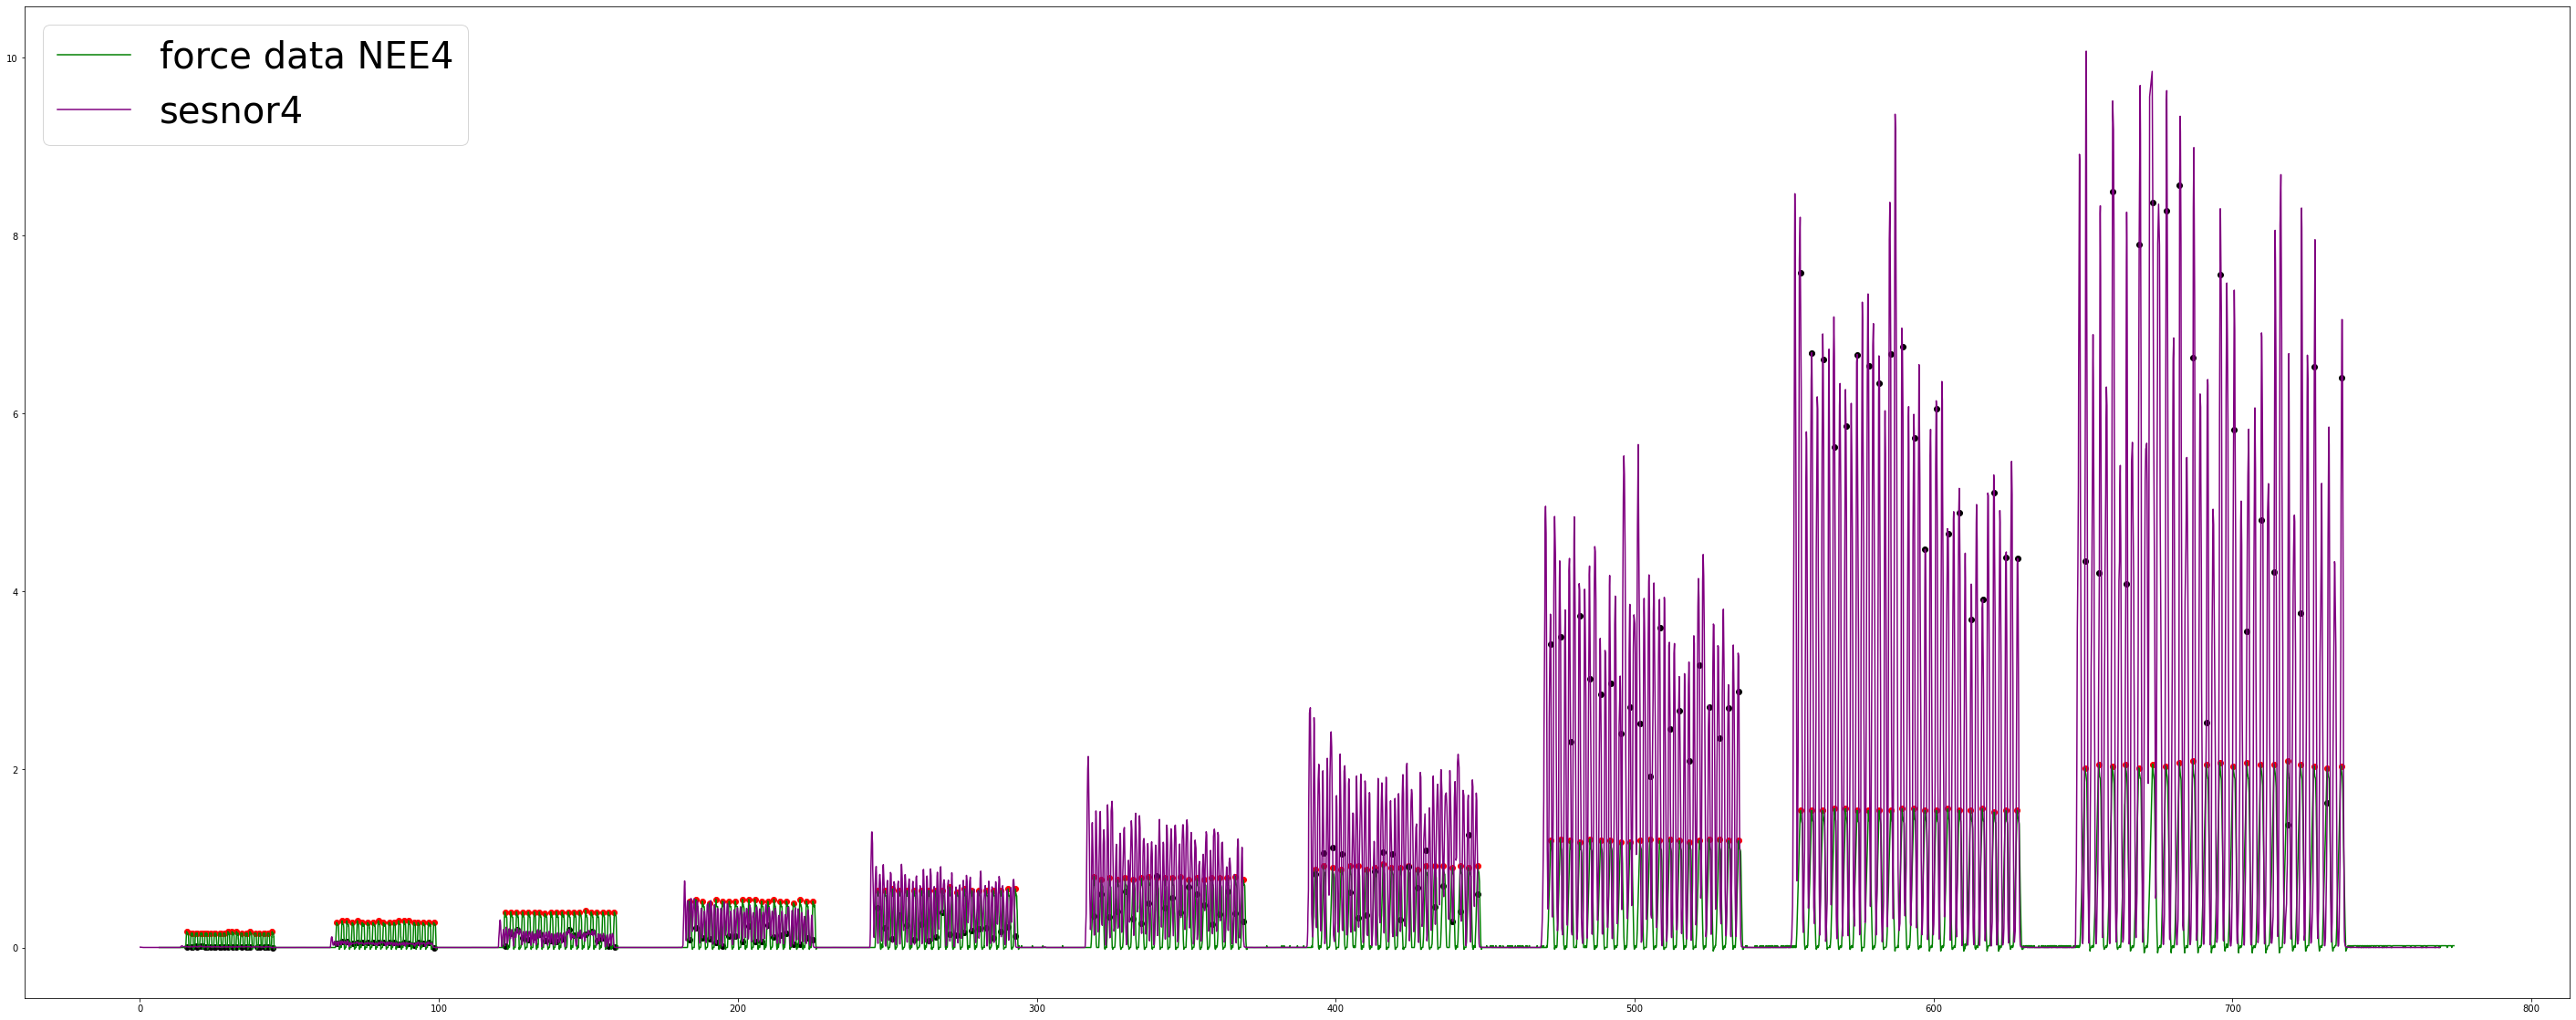

In [37]:
#visualizing the resistance data for each sensor NEE 1- 5 - NEE4

plt.figure(figsize=(50, 20))

# plt.plot(NEE4["Unnamed: 0"],NEE4["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NEE4["Unnamed: 0"],NEE4["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NEE4["Unnamed: 0"],NEE4["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NEE4["Unnamed: 0"],NEE4["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NEE4 = x_force_NEE4 + 6.5
scaled_NEE4 = NEE4["Unnamed: 0"]

plt.plot(scaled_x_force_NEE4,Load_NEE4,color = 'green', label = 'force data NEE4' )
# plt.plot(scaled_NEE4,NEE4["s3_d"], color = 'blue', label = 'sesnor3')
plt.plot(scaled_NEE4,NEE4["s4_d"], color = 'purple', label = 'sesnor4')


plt.legend(fontsize=40)

print("Sensors 3 and 4 are more profound for NEE4")

#finding the peaks

pidx_Load_NEE4, _ = find_peaks(Load_NEE4,prominence= 0.1 )
peaks_Load_NEE4 = Load_NEE4[pidx_Load_NEE4]
peaks_Ltime_NEE4 = scaled_x_force_NEE4[pidx_Load_NEE4]

plt.scatter(peaks_Ltime_NEE4,peaks_Load_NEE4,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NEE4time = []

peaks_Ltime_NEE4.reset_index(drop = True, inplace = True)
peaks_Load_NEE4.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NEE4)):
    idx_NEE4time.append(bisect.bisect_left(NEE4["Unnamed: 0"], peaks_Ltime_NEE4[i]))

plt.scatter(NEE4["Unnamed: 0"][idx_NEE4time],NEE4["s4_d"][idx_NEE4time],color = 'black')

In [39]:
#Storing the peaks into csv file - NEE4
Load_NEE4peaks =[]

for i in range(len(peaks_Load_NEE4)):
    Load_NEE4peaks.append(peaks_Load_NEE4[i])
    
content_NEE4 = {'R1':NEE4["s1_d"][idx_NEE4time],
              'R2':NEE4["s2_d"][idx_NEE4time],
              'R3':NEE4["s3_d"][idx_NEE4time],
              'R4':NEE4["s4_d"][idx_NEE4time], 
              'Load': Load_NEE4peaks} 

df_NEE4 = pd.DataFrame(content_NEE4, columns = ['R1','R2','R3','R4','Load'])

df_NEE4.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NEE4.csv',index = False, header = True)

Sensor 3 is more profound for NEE5


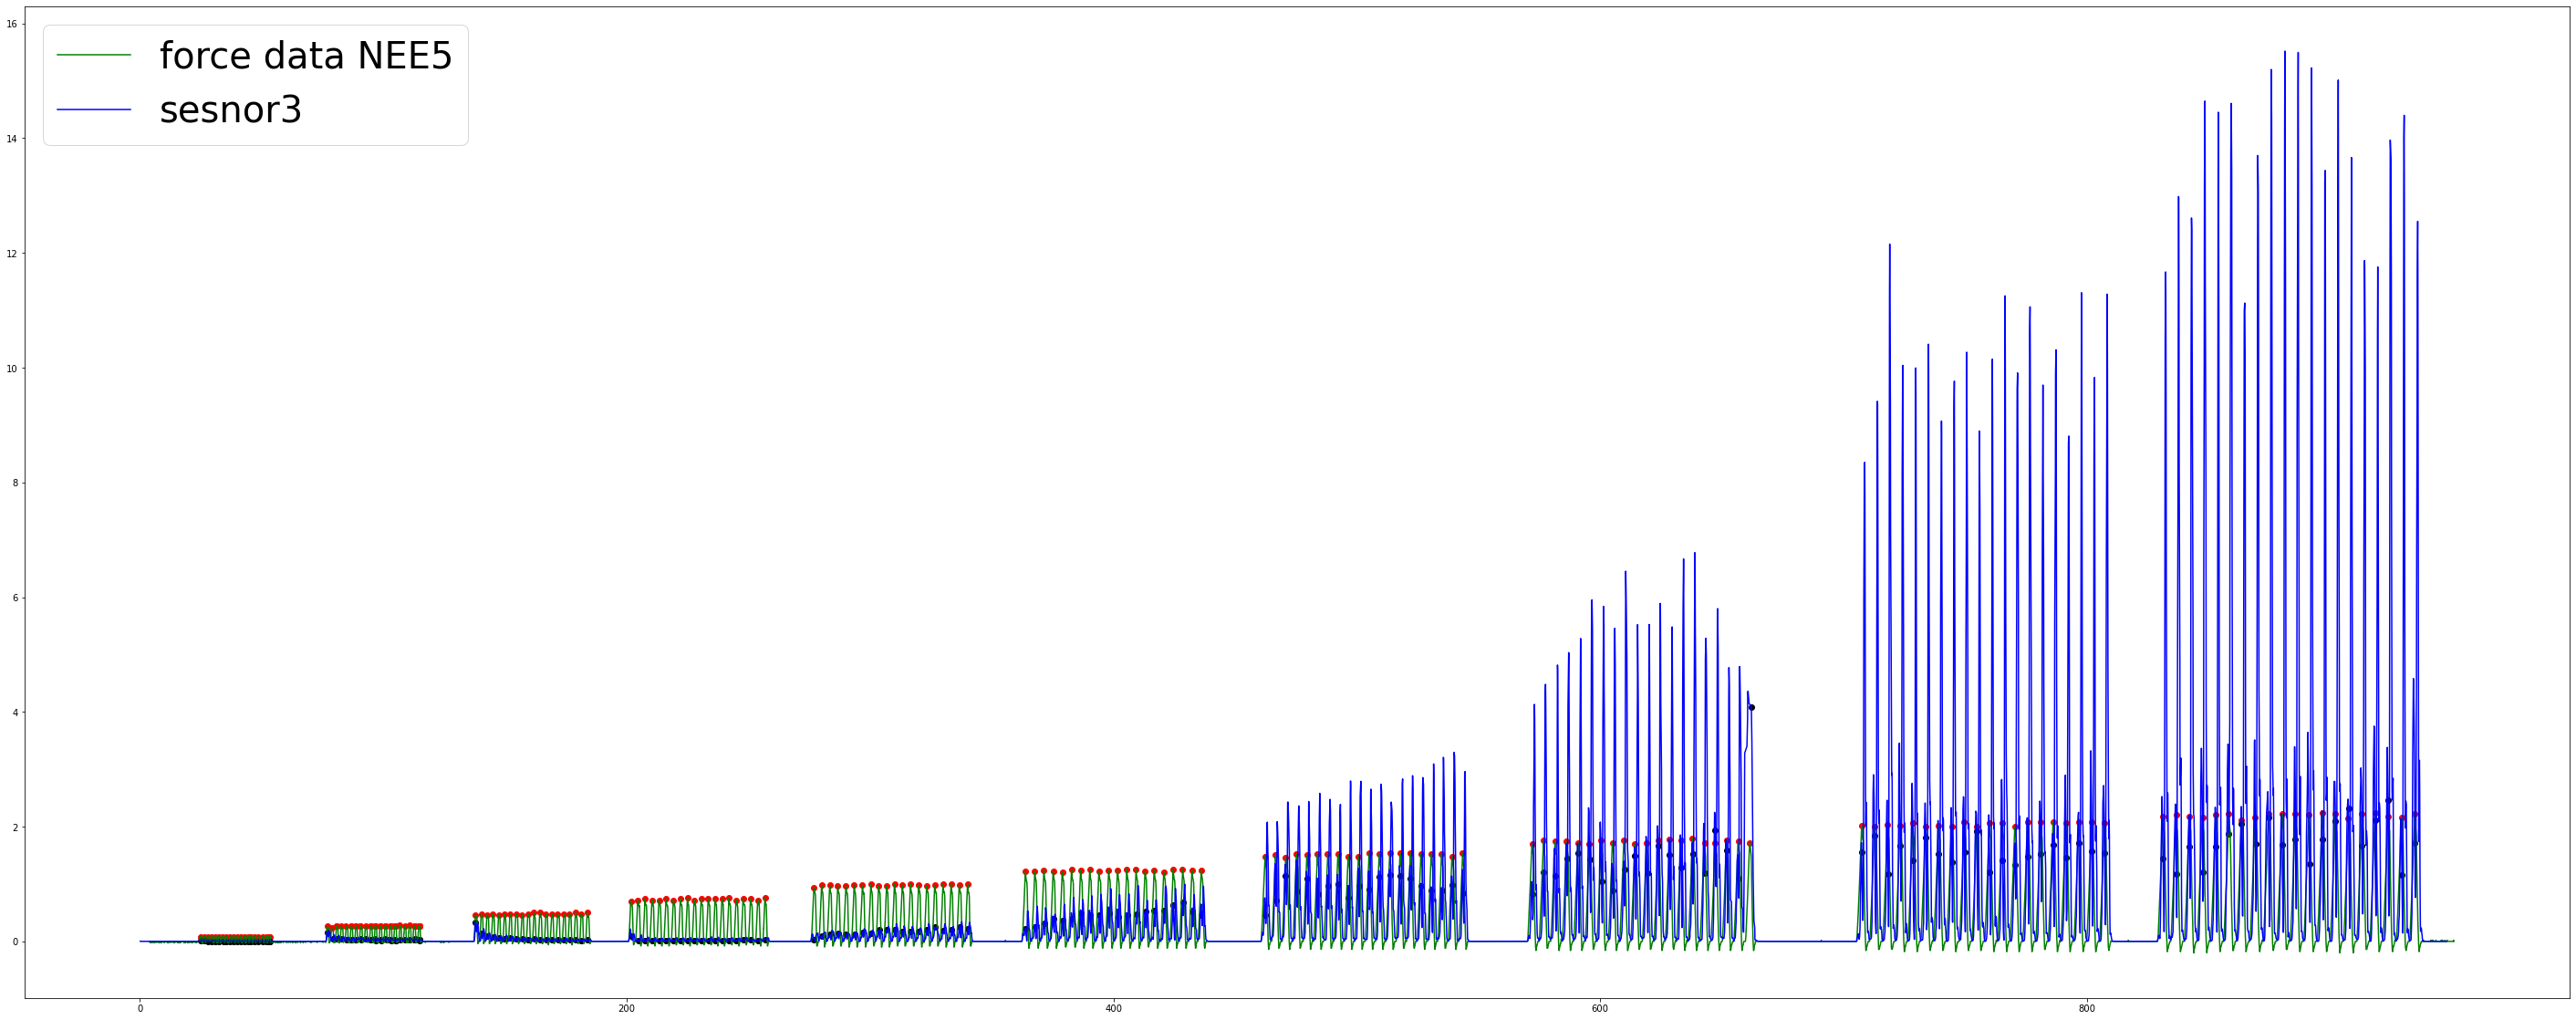

In [48]:
#visualizing the resistance data for each sensor NEE 1- 5 - NEE5

plt.figure(figsize=(50, 20))

# plt.plot(NEE5["Unnamed: 0"],NEE5["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NEE5["Unnamed: 0"],NEE5["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NEE5["Unnamed: 0"],NEE5["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NEE5["Unnamed: 0"],NEE5["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NEE5 = x_force_NEE5 + 4
scaled_NEE5 = NEE5["Unnamed: 0"]

plt.plot(scaled_x_force_NEE5,Load_NEE5,color = 'green', label = 'force data NEE5' )
plt.plot(scaled_NEE5,NEE5["s3_d"], color = 'blue', label = 'sesnor3')


plt.legend(fontsize=40)

print("Sensor 3 is more profound for NEE5")

#finding the peaks

pidx_Load_NEE5, _ = find_peaks(Load_NEE5,prominence= 0.1 )
peaks_Load_NEE5 = Load_NEE5[pidx_Load_NEE5]
peaks_Ltime_NEE5 = scaled_x_force_NEE5[pidx_Load_NEE5]

plt.scatter(peaks_Ltime_NEE5,peaks_Load_NEE5,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NEE5time = []

peaks_Ltime_NEE5.reset_index(drop = True, inplace = True)
peaks_Load_NEE5.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NEE5)):
    idx_NEE5time.append(bisect.bisect_left(NEE5["Unnamed: 0"], peaks_Ltime_NEE5[i]))

plt.scatter(NEE5["Unnamed: 0"][idx_NEE5time],NEE5["s3_d"][idx_NEE5time],color = 'black')

In [49]:
#Storing the peaks into csv file - NEE5
Load_NEE5peaks =[]

for i in range(len(peaks_Load_NEE5)):
    Load_NEE5peaks.append(peaks_Load_NEE5[i])
    
content_NEE5 = {'R1':NEE5["s1_d"][idx_NEE5time],
              'R2':NEE5["s2_d"][idx_NEE5time],
              'R3':NEE5["s3_d"][idx_NEE5time],
              'R4':NEE5["s4_d"][idx_NEE5time], 
              'Load': Load_NEE5peaks} 

df_NEE5 = pd.DataFrame(content_NEE5, columns = ['R1','R2','R3','R4','Load'])

df_NEE5.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NEE5.csv',index = False, header = True)